<a href="https://colab.research.google.com/github/grizzler88/MyFirstRepo/blob/master/Capstone%20-%20Fantasy%20Draft%20Strategy/FantasyNFL_Capstone_Modelling_(Updated_v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 1: Fantasy NFL (Modelling)

The next step for my Capstone project is to clean up the latest verion of my dataset to ensure it is ready for the Modelling stage of the project.

## Getting Started

### Import packages & load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('NFL_FantasyData_2015_2019_EDA_v3.csv')
#df.head()

### Review Dataset

Dataset has unamed column 'Unnamed: 0' from import that is not of value and should be removed.

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
#df.head()

In [5]:
df.shape

(22410, 47)

Next, we will look see what data types are in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22410 entries, 0 to 22409
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TEAM             22410 non-null  object 
 1   OPP              22410 non-null  object 
 2   DATE             22410 non-null  object 
 3   SEASON           22410 non-null  int64  
 4   WEEK             22410 non-null  object 
 5   MONTH            22410 non-null  object 
 6   TIME             22410 non-null  object 
 7   POS              22410 non-null  object 
 8   PLAYER           22410 non-null  object 
 9   FAN_ACTUAL       22410 non-null  float64
 10  HOME             22410 non-null  int64  
 11  DOME             22410 non-null  int64  
 12  GRASS            22410 non-null  int64  
 13  SUNDAY           22410 non-null  int64  
 14  WEEK_SEASON_ID   22410 non-null  int64  
 15  FAN_AVG          22410 non-null  float64
 16  PASSCOMP_AVG     22410 non-null  float64
 17  PASSATT_AVG 

There are 8 objects or categorical variables that we will need to make numeric.

### Categorical variables

In [7]:
object_cols = list(df.columns[df.dtypes == np.object])

In [8]:
for x in object_cols:
  val = df[x].nunique()
  print(x,' = ', val)

TEAM  =  32
OPP  =  32
DATE  =  248
WEEK  =  17
MONTH  =  5
TIME  =  3
POS  =  4
PLAYER  =  1012


The review of the ojbect columns shows that including them all would create +1,300 new columns.

For the moment, we will not look at the date fields of DATE, WEEK, MONTH, DAY, TIME.

We will instead concentrate on the POS, TEAM, OPP, and PLAYER columns. 

#### Remove 'PLAYER' column

First, I will remove the PLAYER field. Turning this to dummy values would create 1,011 additional columns which would add too many dimensions to the problem. It is also unlikely that the player's name itself will be a main indicator of performance, but rather the statistics that they produce.

In [9]:
df = df.drop(columns='PLAYER')

In [10]:
#df.shape

#### Remove 'TEAM' and 'OPP' column

Transforming the TEAM and OPP columns into dummy variables would add 31 columns each. We also noted during our EDA that, althought the Team and Coach columns were providing us with information, that this information could be proxied using team peformance statisitcs (i.e. it likely isn't the name of the team that influences a player performance but rather the team performance under a certain organisation structure that influences it).

With this in mind, I have decided to remove both the 'TEAM' and 'OPP' column. However, based on the performance of our initial modelling we could look to reintroduce if required.

In [11]:
df = df.drop(columns=['TEAM', 'OPP'])

In [12]:
#df.shape

#### Create dummy variables for 'POS' column

Throughout the EDA, we saw that position of a player was an important indicator of fantasy performance and therefore we will include it in our model. To do this, we will create dummy variables below.

In [13]:
dummy_POS = pd.get_dummies(df.POS, prefix='POS', drop_first=True)

In [14]:
df = pd.concat([df, dummy_POS], axis=1).drop(columns=['POS'])

In [15]:
df.head()
df.shape

(22410, 46)

### Date variables

#### Date

Our data has 248 unique values in our 'DATE' column. While we want to capture some time element in our model, I don't believe it needs to be as granular as a specific date. For this reason, we will remove the date field from our data set for now but can look to include again if we believe the time is becoming an issue with our data.

In [16]:
df = df.drop(columns=['DATE'])

In [17]:
df.shape

(22410, 45)

#### Week, Month & Season

As mentioned when removing the 'DATE' column, we have other variables in our dataset that we believe can capture the time and date aspect of data. This namely relates to the following columns:

* 'WEEK' - what gamewek was a game played in (there are 17 gameweeks in an NFL season)
* 'MONTH' - what month was a game played in
* 'SEASON' - what season was a game played in
* 'WEEK_SEASON_ID' - what number in order did a game get played in since start of this dataset
* 'SUNDAY' - was game played on a Sunday (1 if yes, 0 if no)
* 'TIME' - what time was game played (Noon, Afternoon, Night)


For this, there are two main decisions that need to be answered in order:

1.  Do we want to include 'WEEK_SEASON_ID'?
  * This is an ordered numeric series that may cause issues with our model if not correctly applied. For this reason, it is probably best to __remove 'WEEK_SEASON_ID'.__

2.  Do we want to keep 'WEEK' or 'MONTH' column?
  * During our EDA, we found that both showed a trend that as the season went on the lower average fantasy points became. However, including both will likely create a duplication of information so it is probably best to proceed with only one for our modelling. __As 'MONTH' required fewer variables, we will begin with this but can return to include 'WEEK' if required later.__


This means that we will proceed with the 'MONTH', 'SEASON', 'TIME', and 'SUNDAY' columns to capture the time elements of the data in our modelling. To do this, we will need to create dummy variable for all the columns (for 'SEASON' we will first have to turn into an object), except for 'SUNDAY' which is already created as a boolean/binary column.

In [18]:
df = df.drop(columns=['WEEK_SEASON_ID', 'WEEK'])

In [19]:
df.shape

(22410, 43)

In [20]:
df['SEASON'] = df['SEASON'].astype(object)

In [21]:
dummy_SEASON = pd.get_dummies(df.SEASON, prefix='SEASON', drop_first=True)
dummy_MONTH = pd.get_dummies(df.MONTH, prefix='MONTH', drop_first=True)
dummy_TIME = pd.get_dummies(df.TIME, prefix='TIME', drop_first=True)

In [22]:
df = pd.concat([df, dummy_SEASON, dummy_MONTH, dummy_TIME], axis=1).drop(columns=['SEASON', 'MONTH', 'TIME'])

In [23]:
df.head()
df.shape

(22410, 50)

## Training and Test Data

Now that all the data is in numeric format, we will have to scale to ensure it has the correct distribution to support modelling. However, prior to this, we will need to split our data into Train and Test data.

First, I will import the train_test_split fuction from sklearn.

In [24]:
from sklearn.model_selection import train_test_split

Next, I will breakout my data into independent and dependent variables. 

For our model, we have two potential dependent variables  - 'FAN_ACTUAL' or 'cluster_4'.  'FAN_ACTUAL' is a a continuous variable and 'cluster_4' is a categorical variable meaning the choice between which variable we use will dicate what type of model - regression or classification.

To start we will focus on 'FAN_ACTUAL'.

In [25]:
X = df.drop(['FAN_ACTUAL', 'cluster_4'], axis=1)
y = df['FAN_ACTUAL']

Now, I will split my data into training and test data. Due to the high number of dimensions in the dataset, I am going to set my test zize at 20% - lower than the default option of 25%. 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

## Scaling

In [27]:
X.describe()

,HOME,DOME,GRASS,SUNDAY,FAN_AVG,PASSCOMP_AVG,PASSATT_AVG,PASSCOMP%_AVG,PASSYDS_AVG,PASSTD_AVG,INT_AVG,QBRAT_AVG,SACK_AVG,SACKYDS_AVG,PASSYDS_300_AVG,PASSYDS_400_AVG,RUSHATT_AVG,RUSHYDS_AVG,RUSHTD_AVG,FUM_AVG,FUMLST_AVG,RUSHYDS_100_AVG,RUSHYDS_200_AVG,TGTS_AVG,REC_AVG,RECYDS_AVG,RECTD_AVG,RECYDS_100_AVG,RECYDS_200_AVG,PTS_FOR_AVG,PTS_AGT_AVG,WIN/TIE_AVG,OPP_PTS_FOR_AVG,OPP_PTS_AGT_AVG,OPP_WIN/TIE_AVG,POS_RB,POS_TE,POS_WR,SEASON_2016,SEASON_2017,SEASON_2018,SEASON_2019,MONTH_January,MONTH_November,MONTH_October,MONTH_September,TIME_Night,TIME_Noon
count,22410.00000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.000000,22410.00000,22410.000000,22410.000000,22410.000000,22410.000000
mean,0.49286,0.250870,0.559036,0.847256,7.540876,2.452454,3.861323,0.079474,27.963528,0.175565,0.089573,11.367761,0.256783,1.699108,0.053429,0.003153,2.895828,12.283151,0.089194,0.116354,0.055332,0.042600,0.000491,3.633118,2.441280,27.912379,0.174554,0.084627,0.000807,22.746088,22.665462,0.504332,22.667321,22.712480,0.500892,0.296029,0.184516,0.391031,0.203614,0.204596,0.202811,0.201830,0.025524,0.23784,0.253503,0.191120,0.196430,0.549353
std,0.49996,0.433524,0.496514,0.359749,6.161600,6.878654,10.756930,0.208177,78.749941,0.535357,0.296911,29.988032,0.778899,5.273701,0.222486,0.030521,4.947567,22.129624,0.219471,0.239117,0.138890,0.184523,0.011799,2.909681,1.906358,25.561921,0.262745,0.248650,0.014224,5.930808,5.475222,0.285957,5.940760,5.459414,0.286925,0.456514,0.387913,0.487992,0.402694,0.403415,0.402102,0.401375,0.157715,0.42577,0.435026,0.393192,0.397306,0.497569
min,0.00000,0.000000,0.000000,0.000000,-2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,1.000000,7.500000,0.000000,0.000000,0.000000,18.750000,19.000000,0.250000,18.500000,19.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,1.000000,1.000000,5.841667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,3.250000,2.250000,21.750000,0.000000,0.000000,0.000000,22.500000,22.500000,0.500000,22.250000,22.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,1.00000,1.000000,1.000000,1.000000,10.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,14.729167,0.000000,0.250000,0.000000,0.000000,0.000000,5.500000,3.500000,42.000000,0.250000,0.000000,0.000000,26.500000,26.250000,0.750000,26.500000,26.500000,0.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,44.090000,36.000000,54.000000,1.000000,403.000000,5.000000,3.000000,158.300000,7.000000,54.000000,2.000000,1.000000,29.500000,168.000000,2.00000

As can be seen in the table above, the ranges of values differs greatly between each column. This suggest that in order to compare values across columns, we should to transform all are values to a similar scale.

To do this, we will use the StandarScaler() method from sklearn.preprocessing

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
#pd.DataFrame(X_train_scaled, columns=list(X.columns))

In [31]:
#pd.DataFrame(X_test_scaled, columns=list(X.columns))

## Feature Elimination

We still have 50 columns remaining in are data. 

Our target variable will either be 'FAN_TOT' or 'cluster_4' so these will be used as our y variable and not included as explantory variables.

However, this sitll leaves us with 48 columns to be used as our explanatory features. This is still quite high and we would like to reduce the number of feature if possible. There are a couple of ways of doing this 


* Remove Low Variance Features
* Remove Highly Correlated Features
* Univariate Feature Selection
* Recursive Feature Elimination
* Meta-transforme Feature Elimination

In the below sections, we will look at these various different approaches before deciding on best one for final feature selection.

Finally, I would like to mention Principal Component Analysis. During our EDA, we looked at PCA as way to visualise our clustering but could also be used here for dimension reduction. However, applying this apporach removes column names and make the results more difficult to interpret. For this reason, I would prefer not go with this option for now.


### Low Variance Feature Elimination

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. 

Below we have applied a threshold of 0.1, which means we are looking for columns where approximately 90% of the values are similar.

When we apply this, we see that no columns are removed.

In [32]:
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0.1)
var_thres.fit(X_train_scaled)

X_train_scaled_varthres = var_thres.transform(X_train_scaled)
X_train_scaled_varthres.shape

(16807, 48)

In [33]:
cols = var_thres.get_support(indices=True)

X_varthres = X.iloc[:,cols]
#X_varthres.head()

### Covariance Feature Selection

Next we will check the dataset to see if it contain correlated features. Two or more than two features are correlated if they are close to each other in the linear space.

Correlation between the output observations and the input features is very important and such features should be retained. However, if two or more than two features are mutually correlated, they convey redundant information to the model and hence only one of the correlated features should be retained to reduce the number of features.

https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/ 

Below we look to identify which variables have a correlation (or pearson coefficient) greater than 0.8 and look to drop these columns. This reduces the dataset by 11 features to 37.

In [34]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Create correlation matrix
corr_matrix = X_train_scaled_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

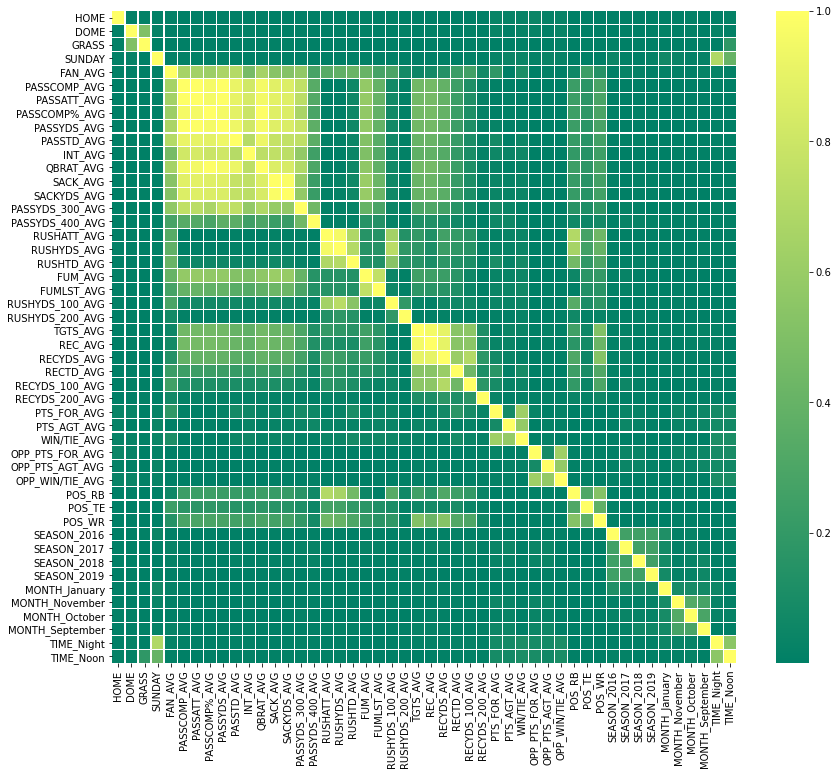

In [35]:
_ = plt.figure(figsize=(14, 12))
_ = sns.heatmap(corr_matrix, linewidth=.1, cmap='summer', annot=False)

plt.show()

In [36]:
to_drop

['PASSATT_AVG',
 'PASSCOMP%_AVG',
 'PASSYDS_AVG',
 'PASSTD_AVG',
 'INT_AVG',
 'QBRAT_AVG',
 'SACK_AVG',
 'SACKYDS_AVG',
 'RUSHYDS_AVG',
 'REC_AVG',
 'RECYDS_AVG']

In [37]:
X_covar = X.drop(columns=to_drop)
X_covar.shape

(22410, 37)

### Univariate Feature Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. 

These filter methods methods where individual features are ranked according to specific criteria with the top N or perentile of features are then selected. Different types of ranking criteria are used for univariate filter methods, for example fisher score, mutual information, and variance of the feature.

One disadvantage of univariate filter methods is that they may select redundant features because the relationship between individual features is not taken into account while making decisions. Univariate filter methods are ideal for removing constant and quasi-constant features from the data.

Below we used f_regression and mutual_info_regression from sklearn.feature_selection package to understand which columns could potentially be removed from the dataset. For each model, I use a different approach for selecting features - with SelectPercentile for f_regression to identify the features in top 50% of features, and SelectKBest for mutual_info_regression to identify the top 5 features in the data using this approach. This results in the following dimension reduction in the data:

* f_regression (with SelectPercentile): 24 columns
* mutual_info_regression (with Select KBest): 5 columns

In [38]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_regression, mutual_info_regression

#X_train_scaled.shape

#### F_Regression

In [39]:
f_reg = SelectPercentile(f_regression, percentile=50)
f_reg.fit(X_train_scaled, y_train)

X_train_scaled_freg = f_reg.transform(X_train_scaled)
X_train_scaled_freg.shape

(16807, 24)

In [40]:
cols = f_reg.get_support(indices=True)

X_freg = X.iloc[:,cols]

#X_freg.head()
#list(X_freg.columns)

#### Mutual Info Regression

In [41]:
mi_reg = SelectKBest(mutual_info_regression, k=5)
mi_reg.fit(X_train_scaled, y_train)

X_train_scaled_mireg = mi_reg.transform(X_train_scaled)
X_train_scaled_mireg.shape

(16807, 5)

In [42]:
cols = mi_reg.get_support(indices=True)

X_mireg = X.iloc[:,cols]

#X_mireg.head()
#list(X_mireg.columns)

### Recursive Feature Elimination

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE 

For this approach, I used two models:
1. RFE model using an Support Vector Regression (SVR) estimator aimed at selecting the top 5 features in the dataset
2. RFECV model using a Linear Regression / OLS estimator aimed at minimising the MSE

#### Linear SVR

In [84]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector.fit(X_train_scaled, y_train)

#selector.support_
#selector.ranking_

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='scale', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=5, step=1, verbose=0)

In [85]:
cols = selector.get_support(indices=True)

X_selector = X.iloc[:,cols]

X_selector.head()

,FAN_AVG,PASSATT_AVG,PASSYDS_AVG,RUSHATT_AVG,TGTS_AVG
0,1.1,0.0,0.0,1.0,2.0
1,6.0,0.0,0.0,0.0,11.0
2,0.1,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.0,2.0
4,2.9,40.0,175.0,1.0,0.0


#### Linear Regression

In [45]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')

rfecv.fit(X_train_scaled, y_train)

RFECV(cv=None,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [46]:
rfecv.support_
rfecv.ranking_

array([ 1, 10,  1, 17,  1,  1,  1,  1,  1,  1,  8,  1,  1,  1,  1,  9,  1,
        1,  1,  1,  1,  1, 21,  1,  1,  1,  1,  1, 13,  4,  5,  1, 14,  1,
        6,  1,  3,  7, 15,  1, 22, 19, 18, 12, 11,  2, 16, 20])

In [47]:
cols = rfecv.get_support(indices=True)

X_rfecv = X.iloc[:,cols]

X_rfecv.head()
X_rfecv.shape

(22410, 27)

### SelectFromModel

SelectFromModel is a meta-transformer that can be used along with any estimator that importance of each feature through a specific attribute (such as coef_, feature_importances_) or callable after fitting. The features are considered unimportant and removed, if the corresponding importance of the feature values are below the provided threshold parameter.

https://scikit-learn.org/stable/modules/feature_selection.html 

Below I have applied this approach using a Lasso Regression model.

#### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso_feat = Lasso(alpha=1, random_state=42)
select_model = SelectFromModel(lasso_feat, threshold='mean')
select_model.fit(X_train_scaled, y_train)

SelectFromModel(estimator=Lasso(alpha=1, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False,
                threshold='mean')

In [49]:
cols = select_model.get_support(indices=True)

X_select_model = X.iloc[:,cols]


X_select_model.shape
X_select_model.head()

,FAN_AVG,PASSATT_AVG
0,1.1,0.0
1,6.0,0.0
2,0.1,0.0
3,0.5,0.0
4,2.9,40.0


### Summary

Variety of different approaches were used to identify what features should be included in the analysis. Below highlights the number of features include in each model.

After review, it seems the Recursive Feature Elimination approach provides the most comprehensive technique for removing variables by using an iterative process to select the optimal number of features. Based on this, we will look to repeat this process in the next section to identify the correct number of features to proceed with in our model.

In [ ]:
feat_reduction_sizes = [X_varthres.shape[1], X_covar.shape[1], X_freg.shape[1], X_mireg.shape[1], X_selector.shape[1], X_rfecv.shape[1], X_select_model.shape[1] ]
feat_reduction_names = ['Variance Threshold', 'Covariance', 'Univariate w/ freg', 'Univariate w/ mutual info reg', 'Recursive w/ SVR', 'Recursive w/ Linear Reg', 'SelectFromModel w/ Lasso' ]
feat_reduction_cols = [list(X_varthres.columns), list(X_covar.columns), list(X_freg.columns), list(X_mireg.columns), list(X_selector.columns), list(X_rfecv.columns), list(X_select_model.columns) ]

In [ ]:
_ = plt.figure(figsize=(20,4))
_ = plt.bar(feat_reduction_names, feat_reduction_sizes)
_ = plt.ylabel('Number of Features')
_ = plt.title('Final Features by Elimination Model')

plt.show()

In [ ]:
feat_elim_df = pd.DataFrame({'Model Name': feat_reduction_names, 'Number of Features': feat_reduction_sizes, 'Columns Included':feat_reduction_cols})
feat_elim_df

In [ ]:
feat_elim_df[feat_elim_df['Number of Features'] == 5]

In [ ]:
for row in feat_elim_df[feat_elim_df['Number of Features'] == 5]['Columns Included']:
  print(row[0])
  print(row[1])
  print(row[2])
  print(row[3])
  print(row[4])
  print()

In [ ]:
#for x in list(X_rfecv.columns):
  #print(x)

### Final Features

We will run our final feature elimination model - a RFECV (Recursive Feature Elimination with Cross-Validation). The estimator for this will be an SVR using a "linear" kernel and reguralisation parameter of 1.

Ideally, I would have performed this model on multiple kernels and C levels but due to time and computing restraints, this is not possible at moment but an area for improvement in future analysis.

The model identifies 24 features as being optimal number for our modelling.

In [50]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear", C=1, epsilon=0.1, gamma='scale')
rfecv = RFECV(estimator, step=1, scoring='neg_mean_squared_error')
rfecv.fit(X_train_scaled, y_train)

RFECV(cv=None,
      estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                    gamma='scale', kernel='linear', max_iter=-1, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [78]:
cols = rfecv.get_support(indices=True)

X_rfecv = X.iloc[:,cols]

X_rfecv.head()
X_rfecv.shape
#X_rfecv.columns

(22410, 24)

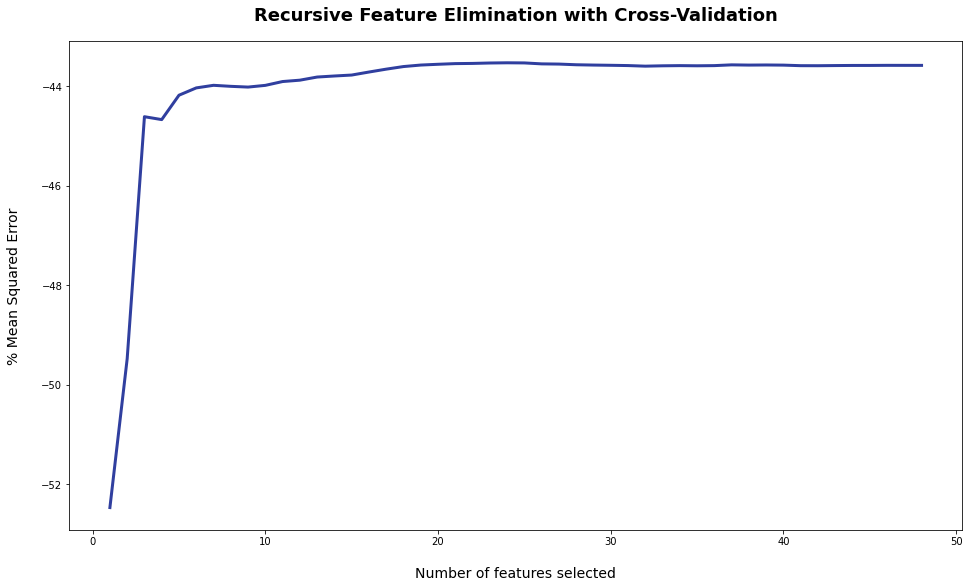

Optimal number of features : 24


In [58]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Mean Squared Error', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

print("Optimal number of features : %d" % rfecv.n_features_)

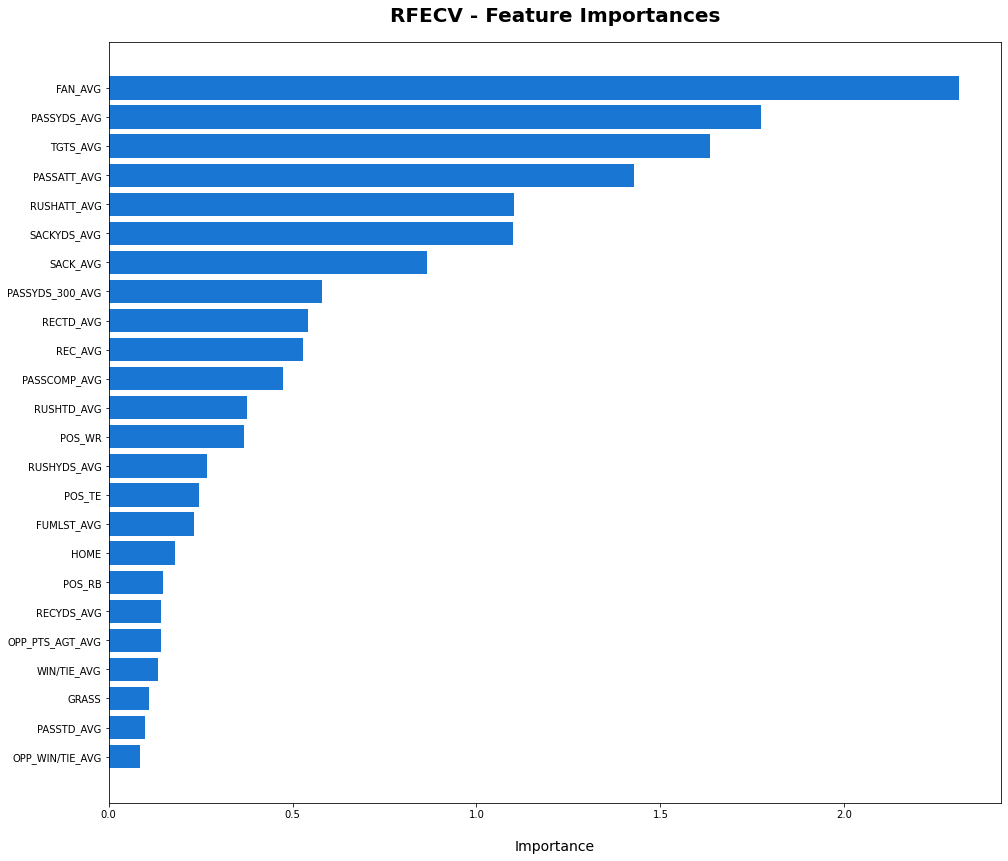

In [76]:
dset = pd.DataFrame()
dset['attr'] = X_rfecv.columns
dset['importance'] = np.absolute(rfecv.estimator_.coef_[0])

dset = dset.sort_values(by='importance', ascending=True)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [77]:
#rfecv.support_
#rfecv.ranking_


#### Transform Training and Test Data

Lastly, I will transform my X_train_scaled and X_test_scaled data to reflect the features identified in the RFECV model.

In [80]:
X_train = rfecv.transform(X_train_scaled)
X_test = rfecv.transform(X_test_scaled)

## Regression

'FAN_ACTUAL' is the target variable of this analysis and is a continuous variable - for this reason we will be focused on Regression.

Linear Regression has a number of assumptions to be met:

1. Linear relationship: There exists a linear relationship between the independent variables and the dependent variable.

2. Independence: The residuals are independent.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed.

If one or more of these assumptions are violated, then the results of our linear regression may be unreliable or even misleading.

https://www.statology.org/linear-regression-assumptions/ 

With the above in mind, we will begin with simple regression models and look to expand on this once we get a sense of how the model is performing.

**MAY USE, NOT SURE**

Given a dataset containing predictor variables X and outcome/response variable Y, linear regression can be used to:

* Build a predictive model to predict future values of Y^, using new data X∗ where Y is unknown.
* Model the strength of the relationship between each independent variable Xi and Y
  * Many times, only a subset of independent variables Xi will have a linear relationship with Y
  * Need to figure out which Xi contributes most information to predict Y
* It is in many cases, the first pass prediction algorithm for continuous outcomes.



### OLS

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

#### MODEL 1: FAN_ACTUAL vs FAN_AVG

In [ ]:
import statsmodels.api as sm

X_train1 = X_train_scaled_df['FAN_AVG']
X_train1 = sm.add_constant(X_train1)
y_train = np.array(y_train)

In [ ]:
OLS_1 = sm.OLS(y_train, X_train1)
OLS_1 = OLS_1.fit()

print(OLS_1.summary())

Decent start

F-statistic is significant - meaning we can reject the null that the coefficients in model are 0 and do not imporve the model's fit.

R-squared is 0.314 - meaning that the model currently explains 31% of the variance in our target variable, 'FAN_ACTUAL'.

FAN_AVG coefficient is signficant - meaning that fantasy 4-week average performance statistically significant predictor of how a player will perform in a given week. The coefficient of 4.5 seems to indicate that a one STD increase in FAN_AVG (because we have scaled data) will translate to an additional 4.5 fantasy points in a given week.

Durbin-Watson of 2.041 suggests the model does not suffer from Autocorrelation.

#### MODEL 2: FAN_ACTUAL vs FAN_AVG (with Position included)

In [ ]:
X.columns

In [ ]:
X_train2 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR']]
X_train2 = sm.add_constant(X_train2)

OLS_2 = sm.OLS(y_train, X_train2)
OLS_2 = OLS_2.fit()

print(OLS_2.summary())

#### MODEL 3/4: FAN_ACTUAL vs FAN_AVG (with Position and Month included)

In [ ]:
X_train3 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_January', 'MONTH_November', 'MONTH_October', 'MONTH_September']]
X_train3 = sm.add_constant(X_train3)

OLS_3 = sm.OLS(y_train, X_train3)
OLS_3 = OLS_3.fit()

print(OLS_3.summary())

Little change. R-squared remained the same.

Only September seems to have an impact.

In [ ]:
X_train4 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September']]
X_train4 = sm.add_constant(X_train4)

OLS_4 = sm.OLS(y_train, X_train4)
OLS_4 = OLS_4.fit()

print(OLS_4.summary())

#### MODEL 5: FAN_ACTUAL vs FAN_AVG (with Position, September and Time of Day included)

In [ ]:
X_train5 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September', 'TIME_Night', 'TIME_Noon']]
X_train5 = sm.add_constant(X_train5)

OLS_5 = sm.OLS(y_train, X_train5)
OLS_5 = OLS_5.fit()

print(OLS_5.summary())

Time of Day does not improve the model.

MODEL 6/7: FAN_ACTUAL vs FAN_AVG (with Position, September and Season included)

In [ ]:
X_train6 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September','SEASON_2016', 'SEASON_2017', 'SEASON_2018', 'SEASON_2019' ]]
X_train6 = sm.add_constant(X_train6)

OLS_6 = sm.OLS(y_train, X_train6)
OLS_6 = OLS_6.fit()

print(OLS_6.summary())

Only 2017 adds value to the model.

In [ ]:
X_train7 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September', 'SEASON_2017']]
X_train7 = sm.add_constant(X_train7)

OLS_7 = sm.OLS(y_train, X_train7)
OLS_7 = OLS_7.fit()

print(OLS_7.summary())

MODEL 8/9: FAN_ACTUAL vs FAN_AVG (with Position, September, 2017 Season and Gameday stats included)

In [ ]:
X_train8 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September', 'SEASON_2017', 'HOME', 'DOME', 'GRASS', 'SUNDAY']]
X_train8 = sm.add_constant(X_train8)

OLS_8 = sm.OLS(y_train, X_train8)
OLS_8 = OLS_8.fit()

print(OLS_8.summary())

Stadium type (Dome or Open roof) and Day of Week (Sunday or not) do not significantly add to the model.

Playing at home significantly does so will include going forward.

Grass is not significant at a 5% level but because it is close to the border, it does not completely rule it out as possible variable of interest. We will keep this in the back of mind as a potential useful variable but for now will exclude.

In [ ]:
X_train9 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September', 'SEASON_2017', 'HOME']]
X_train9 = sm.add_constant(X_train9)

OLS_9 = sm.OLS(y_train, X_train9)
OLS_9 = OLS_9.fit()

print(OLS_9.summary())

R-squared is slightly up but will do review of all models later on.

MODEL 10/11: FAN_ACTUAL vs FAN_AVG (with Position, September, 2017 Season, Home and Team stats included)

In [ ]:
X_train10 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September', 'SEASON_2017', 'HOME', 'PTS_FOR_AVG', 'PTS_AGT_AVG', 'WIN/TIE_AVG']]
X_train10 = sm.add_constant(X_train10)

OLS_10 = sm.OLS(y_train, X_train10)
OLS_10 = OLS_10.fit()

print(OLS_10.summary())



R-squared increased.

Win/Tie rate is not significant.

Points Against is not significant at 5% level (but not far off) so will exclude for now.

Points For is significant but interestingly enough it is suggesting a negative relationship meaning that as your team's average points scored goes up, your projected fantasy performance goes down. This is slightly counter intuitive but seeing but given it's significance I will include and see if it holds up.

In [ ]:
X_train11 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September', 'SEASON_2017', 'HOME', 'PTS_FOR_AVG']]
X_train11 = sm.add_constant(X_train11)

OLS_11 = sm.OLS(y_train, X_train11)
OLS_11 = OLS_11.fit()

print(OLS_11.summary())

MODEL 12: FAN_ACTUAL vs FAN_AVG (with Position, September, 2017 Season, Home, Points For and Opp stats included)

In [ ]:
X_train12 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September', 'SEASON_2017', 'HOME', 'PTS_FOR_AVG', 'OPP_PTS_FOR_AVG', 'OPP_PTS_AGT_AVG', 'OPP_WIN/TIE_AVG']]
X_train12 = sm.add_constant(X_train12)

OLS_12 = sm.OLS(y_train, X_train12)
OLS_12 = OLS_12.fit()

print(OLS_12.summary())

Opponent's Win/Tie rate and Points For are not significant.

Opponent's Points Agains is significant and suggest that the higher the opposition has conceded on average in the previous week will improve a player's fantasy performance.

In [ ]:
X_train13 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September', 'SEASON_2017', 'HOME', 'PTS_FOR_AVG', 'OPP_PTS_AGT_AVG']]
X_train13 = sm.add_constant(X_train13)

OLS_13 = sm.OLS(y_train, X_train13)
OLS_13 = OLS_13.fit()

print(OLS_13.summary())

#### MODEL 14: Player Stats

In [ ]:
X.columns

In [ ]:
X_train14 = X_train_scaled_df[['FAN_AVG', 'POS_RB', 'POS_TE', 'POS_WR', 'MONTH_September', 'SEASON_2017', 'HOME', 'PTS_FOR_AVG', 'OPP_PTS_AGT_AVG',
                               'PASSCOMP_AVG', 'PASSATT_AVG', 'PASSCOMP%_AVG', 'PASSYDS_AVG', 'PASSTD_AVG', 'INT_AVG', 'QBRAT_AVG', 'SACK_AVG', 'SACKYDS_AVG', 
                               'PASSYDS_300_AVG', 'PASSYDS_400_AVG', 'RUSHATT_AVG', 'RUSHYDS_AVG', 'RUSHTD_AVG','FUM_AVG', 'FUMLST_AVG', 'RUSHYDS_100_AVG', 'RUSHYDS_200_AVG',
                               'TGTS_AVG', 'REC_AVG', 'RECYDS_AVG', 'RECTD_AVG']]
X_train14 = sm.add_constant(X_train14)

OLS_14 = sm.OLS(y_train, X_train14)
OLS_14 = OLS_14.fit()

print(OLS_14.summary())

## SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)

sgd_reg.fit(X_train_scaled, y_train)

In [ ]:
y_pred = sgd_reg.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

r2_score(y_train, y_pred)
sgd_reg.score(X_train_scaled, y_train)

In [ ]:
plt.scatter(y_train,y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_train, y_pred))

## ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV

elasticCV_reg = ElasticNetCV(cv=5, random_state=0)
elasticCV_reg.fit(X_train_scaled, y_train)
ElasticNetCV(cv=5, random_state=0)

print(elasticCV_reg.alpha_)
print(elasticCV_reg.intercept_)
y_pred = elasticCV_reg.predict(X_train_scaled)



In [ ]:
plt.scatter(y_train,y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_train, y_pred))

## Lasso CV

In [ ]:
from sklearn.linear_model import LassoCV

lassoCV_reg = LassoCV(cv=5, random_state=0)
lassoCV_reg.fit(X_train_scaled, y_train)

y_pred = lassoCV_reg.predict(X_train_scaled)

print(lassoCV_reg.score(X_train_scaled, y_train))

In [ ]:
plt.scatter(y_train,y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_train, y_pred))

## Multi-Task Elastic Net CV

In [ ]:
'''

from sklearn.linear_model import MultiTaskElasticNetCV

mten_cv_reg = MultiTaskElasticNetCV(cv=5)
mten_cv_reg.fit(X_train_scaled, y_train)

print(mten_cv_reg.coef_)

print(mten_cv_reg.intercept_)

'''

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

# Fit regression model
dt_reg_1 = DecisionTreeRegressor(max_depth=2)
dt_reg_1.fit(X_train_scaled, y_train)

y_1 = dt_reg_1.predict(X_train_scaled)

#Model 2
#dt_reg_2 = DecisionTreeRegressor(max_depth=5)
#dt_reg_2.fit(X_train_scaled, y_train)
#y_2 = dt_reg_2.predict(X_train_scaled)


import graphviz

dot_data = export_graphviz(dt_reg_1, out_file=None) 
graph = graphviz.Source(dot_data)
graph

# Alternatively for class_names use entr_model.classes_
dot_data = export_graphviz(dt_reg_1, out_file=None, class_names=dt_reg_1.classes_, feature_names=X.columns) 
graph = graphviz.Source(dot_data)
graph

In [ ]:
print('Mean Squared Error :',mean_squared_error(y_train, y_1))
print('R-squared :',r2_score(y_train, y_1))

In [ ]:
# Fit regression model
dt_reg_2 = DecisionTreeRegressor(max_depth=5)
dt_reg_2.fit(X_train_scaled, y_train)
y_2 = dt_reg_2.predict(X_train_scaled)

In [ ]:
dot_data = export_graphviz(dt_reg_2, out_file=None, class_names=dt_reg_1.classes_, feature_names=X.columns) 
graph = graphviz.Source(dot_data)
graph

In [ ]:
print('Mean Squared Error :',mean_squared_error(y_train, y_2))
print('R-squared :',r2_score(y_train, y_2))

In [ ]:
# Fit regression model
dt_reg_3 = DecisionTreeRegressor()
dt_reg_3.fit(X_train_scaled, y_train)
y_3 = dt_reg_3.predict(X_train_scaled)

In [ ]:
print('Mean Squared Error :',mean_squared_error(y_train, y_3))
print('R-squared :',r2_score(y_train, y_3))

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
rf_reg.fit(X_train_scaled, y_train)

y_4 = rf_reg.predict(X_train_scaled)

In [ ]:
print('Mean Squared Error :',mean_squared_error(y_train, y_4))
print('R-squared :',r2_score(y_train, y_4))

In [ ]:
#Feature importances:

features = X.columns
importances = list(rf_reg.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X.columns,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("28.png")
plt.show()
#len(importances)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000, max_features=0.5, max_depth=5, min_samples_leaf=25 ,random_state=42)
rf_reg.fit(X_train_scaled, y_train)

y_5 = rf_reg.predict(X_train_scaled)

In [ ]:
print('Mean Squared Error :',mean_squared_error(y_train, y_5))
print('R-squared :',r2_score(y_train, y_5))

In [ ]:
#Feature importances:

features = X.columns
importances = list(rf_reg.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X.columns,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("28.png")
plt.show()
#len(importances)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train_scaled, y_train)

y_6 = gb_reg.predict(X_train_scaled)

In [ ]:
print('Mean Squared Error :',mean_squared_error(y_train, y_6))
print('R-squared :',r2_score(y_train, y_6))

In [ ]:
#Feature importances:

features = X.columns
importances = list(gb_reg.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X.columns,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("28.png")
plt.show()
#len(importances)